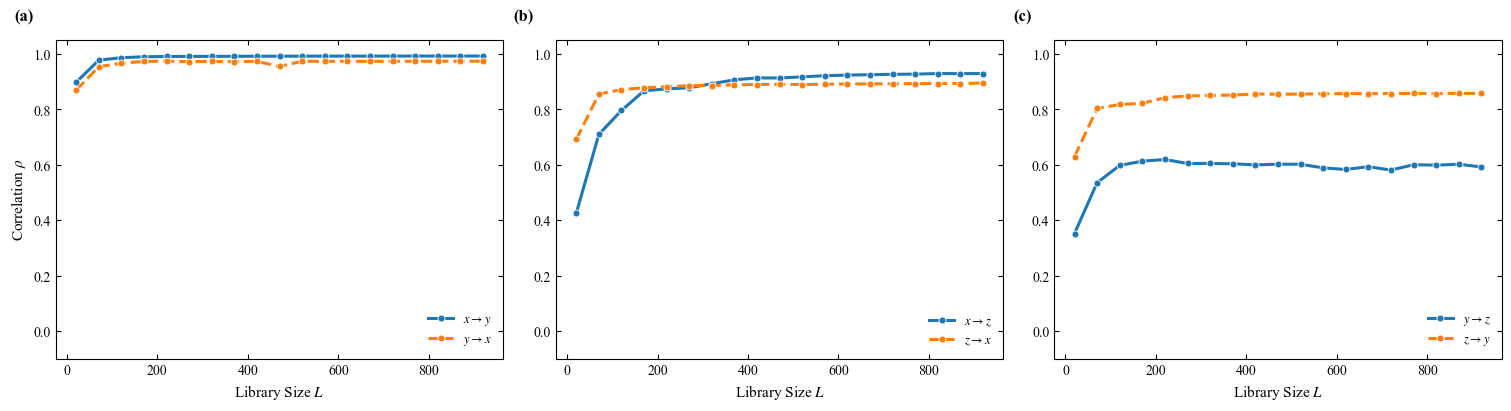

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = 0.01
num_steps = int(1e4)

y = np.zeros((num_steps + 1, 3))
y[0] = np.array([1.0, 1.0, 0.0])

def rossler(xyz, a=0.2, b=0.2, c=5.7):
    x, y, z = xyz
    return np.array([-y - z, x + a * y, b + z * (x - c)])

for i in range(num_steps):
    y[i + 1] = y[i] + rossler(y[i]) * dt

noise_level = 0.05
np.random.seed(42)
y += np.random.normal(0.0, y.std(axis=0) * noise_level, y.shape)

ds = 10
x_ds = y[:, 0][::ds]
y_ds = y[:, 1][::ds]
z_ds = y[:, 2][::ds]
N = len(x_ds)

df = pd.DataFrame({"Time": np.arange(N), "x": x_ds, "y": y_ds, "z": z_ds})

E = 6
tau = 8
exR = 12

sizes_start, sizes_stop, sizes_step = 20, max(21, N - 50), 50
libSizes = f"{sizes_start} {sizes_stop} {sizes_step}"

import pyEDM as edm

out_xy = edm.CCM(dataFrame=df, E=E, tau=tau, columns="x", target="y", libSizes=libSizes, sample=50, exclusionRadius=exR)
out_xz = edm.CCM(dataFrame=df, E=E, tau=tau, columns="x", target="z", libSizes=libSizes, sample=50, exclusionRadius=exR)
out_yz = edm.CCM(dataFrame=df, E=E, tau=tau, columns="y", target="z", libSizes=libSizes, sample=50, exclusionRadius=exR)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'stix'

FONT_SIZE = 10
plt.rcParams.update({
    'font.size': FONT_SIZE,
    'axes.labelsize': FONT_SIZE + 1,
    'axes.titlesize': FONT_SIZE + 1,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,
    'legend.fontsize': FONT_SIZE - 1,
    'figure.titlesize': FONT_SIZE + 2,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'lines.linewidth': 2.2,
    'lines.markersize': 5,
    'legend.frameon': False,
    'axes.grid': False,
})

c1_color = '#1f77b4'
c2_color = '#ff7f0e'

def plot_ccm_panel(ax, out_df, pair_name, panel_label):
    L_col = out_df.columns[0]
    var1 = out_df.columns[1]
    var2 = out_df.columns[2]

    label1 = f"${var1.split(':')[0]} \\to {var1.split(':')[1]}$"
    label2 = f"${var2.split(':')[0]} \\to {var2.split(':')[1]}$"

    ax.plot(out_df[L_col], out_df[var1], color=c1_color, marker='o',
            markeredgewidth=0.6, markeredgecolor='white', label=label1)

    ax.plot(out_df[L_col], out_df[var2], color=c2_color, marker='o', linestyle='--',
            markeredgewidth=0.6, markeredgecolor='white', label=label2)

    ax.set_ylim(-0.1, 1.05)
    ax.set_xlabel(r'Library Size $L$')
    if panel_label == '(a)':
        ax.set_ylabel(r'Correlation $\rho$')

    ax.text(-0.05, 1.05, panel_label, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='bottom', ha='right')

    ax.legend(loc='lower right')

fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

plot_ccm_panel(axes[0], out_xy, "$(x, y)$", "(a)")
plot_ccm_panel(axes[1], out_xz, "$(x, z)$", "(b)")
plot_ccm_panel(axes[2], out_yz, "$(y, z)$", "(c)")

plt.savefig("Fig1_CCM_Convergence.pdf", dpi=300)
plt.show()
